### Mouselinos Spyridon
### HomeWork 4
### February 2020
***

In [1]:
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt

#### Exersize 4
### (A)
***

#### Given the case of a joint distribution between x(independent) and y(dependent) RV,
#### we can easily prove that p(y|x):
* Is a Normal Distribution $N(m_{y|x},s_{y|x})$
* $m_{y|x} = E[y|x] =m_y + a\frac{s_y}{s_x}(x-m_x)$
* $a = \frac{s_{yx}}{s_x s_y}$

#### In our case  we have:
* $m_x=2$
* $m_y=2$
* $s_x=2$
* $s_y=\sqrt{3}$
* $s_{xy}=2$

so $E[y|x] = 0.5x + 1$

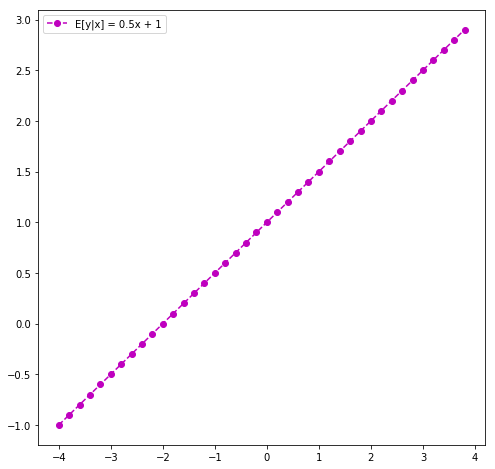

In [2]:
### Let's plot it for values around the mean of X.
x = np.arange(-4,+4, 0.2)
y = 0.5*x + 1
plt.figure(figsize=(8,8))
plt.plot(x,y,'mo--', label='E[y|x] = 0.5x + 1')
plt.legend(loc=2)
plt.show()
plt.close()

### (B)
***

In [3]:
### First of all let's create our custom estimator
### Let's Create Our Custom Least Squares Estimators with option for Ridge Regression
class LSEstimator:
    def __init__(self, l2=0, extend_with_1=True):
        self.l2 = l2
        self.is_fit_ = False
        self.theta = None
        self.extend_with_1 = extend_with_1
        return
    
    def fit(self,X,y):
        train_points_len = len(X)
        label_points_len = len(y)
        assert train_points_len == label_points_len
        
        ### If the model needs to be extended with 1 do it
        if self.extend_with_1:
            ### Add leading '1' to the X's
            X = np.c_[np.ones(len(X)),X]
        else:
            ### Else build a model without Bias, e.g Keep X as it is
            pass
        

        ### Now let's calculate the X^T matrix
        XT = np.transpose(X)

        ### Now the X^T * X
        XTX = np.matmul(XT,X)
        
        ### Now let's add the regularization term
        XTXL2 = XTX + self.l2*np.identity(XTX.shape[0])

        ### Now the inverse of (XT * X) --> (XT *X)^(-1)
        invXTX = pinv(XTXL2)

        ### Now the Θ parameter vector can be given as
        theta = np.matmul(np.matmul(invXTX,XT),y)
        
        ### Raise fit flag 
        self.is_fit_ = True
        self.theta = theta
        return theta
    
    
    
    def predict(self,X, y_true=None):
        if not(self.is_fit_):
            raise ValueError("Fit Model On Data First!\n")
        else:
            if self.extend_with_1:
                ### Add leading '1' to the X's
                X = np.c_[np.ones(len(X)),X]
            else:
                ### Dont add leading '1', keep X as it is
                pass
            
            y_predicted = np.matmul(X,self.theta)
            mse = None
            if y_true is not None:
                error = y_true - y_predicted
                square_error = error*error
                mse = square_error.mean()
                
            return y_predicted, mse
        
    
    def fit_predict(self,X,y):
        self.fit(X=X,y=y)
        pred,mse = self.predict(X=X, y_true=y)
        return pred, mse
    
    
    def coeff(self):
        #Let's print the coefficients
        for idx, f in enumerate(self.theta):
            print("Theta_{} coefficient is {}".format(idx,f[0]))
        return

In [4]:
### Then let's create the data

In [5]:
def create_datasets(n_datasets=100, points_per_dataset=50):
    dataset_list = []
    mean_vector = np.array([2,2])
    sigma_matrix = np.array([[3,2],[2,4]])
    for _ in range(n_datasets):
        ### Create dataset
        dataset = np.random.multivariate_normal(mean_vector,sigma_matrix,points_per_dataset)
        ### Add η noise to y's
        dataset[:,0] += np.random.normal(0,np.sqrt(0.05),points_per_dataset)
        ### Append to list of Datasets
        dataset_list.append(dataset)
    return dataset_list

In [6]:
datasets = create_datasets()

### (C) 
***

#### Adopt the linear estimator f(x;D) and determine its instances f(x;D1),…, f(x;D100),
#### utilizing the LS criterion.

In [7]:
coefficients_list = []
for dataset in datasets:
    X = dataset[:,1]
    y = dataset[:,0]
    estimator = LSEstimator()
    estimator.fit(X=X, y=y)
    coefficients_list.append(estimator.theta)

In [8]:
### Let's find the average over 100 coefficients
avg_c1 = 0
avg_c0 = 0
for cp in coefficients_list:
    avg_c1 += cp[1]
    avg_c0 += cp[0]
    
avg_c1 = avg_c1 / len(coefficients_list)
avg_c0 = avg_c0 / len(coefficients_list)

### (D)
***

#### Plot the estimates in blue vs the optimal MSE estimate in green

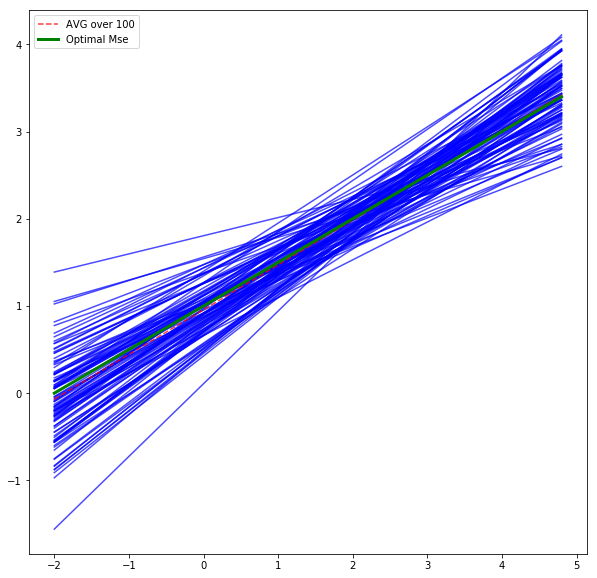

In [9]:
plt.figure(figsize=(10,10))
for coeff_pair in coefficients_list:
    x = np.arange(-2, +5 , 0.2)
    y = coeff_pair[1] * x + coeff_pair[0]
    plt.plot(x,y,'b',alpha=0.7)
### Now let's plot the average over 100 estimate
y_avg = avg_c1 * x + avg_c0
plt.plot(x,y_avg,'r--', alpha=0.75, label='AVG over 100')
### Now let's plot the optimal MSE estimate.
y_best = 0.5*x + 1
plt.plot(x,y_best,'g',linewidth=3.0,label='Optimal Mse')
plt.legend(loc=2)
plt.show()
plt.close()

In [49]:
### We see that the average of our estimations is really close to the Optimal Mse

### (E)
***

In [10]:
#### Redo the previous steps for N_points=5000

In [11]:
datasets = create_datasets(n_datasets=100, points_per_dataset=5000)

In [12]:
coefficients_list = []
for dataset in datasets:
    X = dataset[:,1]
    y = dataset[:,0]
    estimator = LSEstimator()
    estimator.fit(X=X, y=y)
    coefficients_list.append(estimator.theta)

In [13]:
### Let's find the average over 5000 coefficients
avg_c1 = 0
avg_c0 = 0
for cp in coefficients_list:
    avg_c1 += cp[1]
    avg_c0 += cp[0]
    
avg_c1 = avg_c1 / len(coefficients_list)
avg_c0 = avg_c0 / len(coefficients_list)

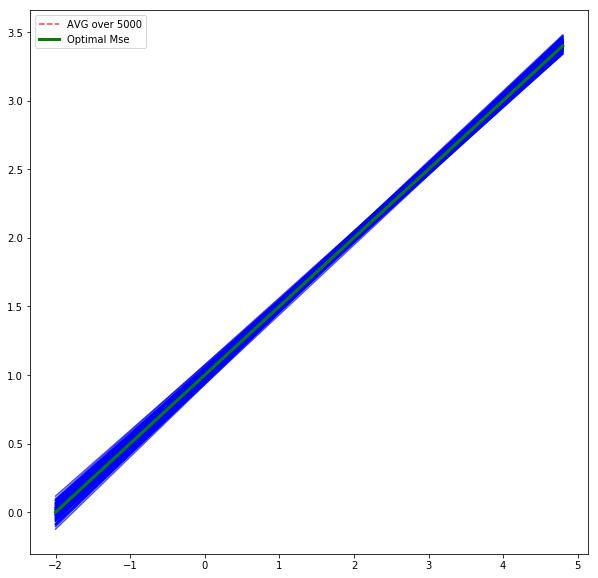

In [14]:
plt.figure(figsize=(10,10))
for coeff_pair in coefficients_list:
    x = np.arange(-2, +5 , 0.2)
    y = coeff_pair[1] * x + coeff_pair[0]
    plt.plot(x,y,'b',alpha=0.7)
### Now let's plot the average over 100 estimate
y_avg = avg_c1 * x + avg_c0
plt.plot(x,y_avg,'r--', alpha=0.75, label='AVG over 5000')
### Now let's plot the optimal MSE estimate.
y_best = 0.5*x + 1
plt.plot(x,y_best,'g',linewidth=3.0,label='Optimal Mse')
plt.legend(loc=2)
plt.show()
plt.close()

In [50]:
### We see that the average of our estimations almost perfectly aligns to the Optimal Mse

#### Exersize 5
### (A)
***

### Let's consider the setup of exersize 3. 
### We have:
* $p(x,y)=3/2$
* $x \in (0,1)$
* $y \in (x^2,1)$

In [15]:
### Let's generate N=100 points of the above distribution.
### We can see that due to the fact that the joint pdf is uniform we can create random points from it and keep only the ones that satisfy that y > x^2 

In [16]:
N = 100

In [17]:
x_array = np.empty(N)
y_array = np.empty(N)

running_idx = 0

while running_idx < N:
    x = np.random.uniform(low=0, high=1)
    y = np.random.uniform(low=x**2, high=1)
    x_array[running_idx] = x
    y_array[running_idx] = y
    running_idx += 1
    

### We know that the optimal MSE estimator for every y given x is $E[y|x]= \frac{x^2+1}{2}$

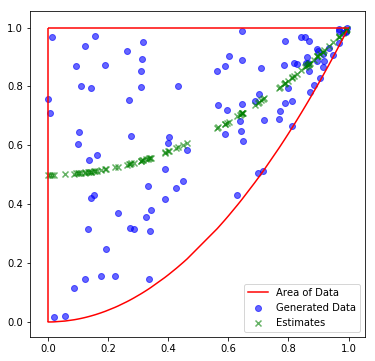

In [18]:
### Let's calculate and plot the estimates
y_est = np.empty(N)
for idx,x in enumerate(x_array):
    y_est[idx] = (x**2 + 1) / 2
    
### Let's plot the data
plt.figure(figsize=(6,6))
plt.scatter(x=x_array, y=y_array, marker='o',color='blue', alpha=0.6,label='Generated Data')
plt.scatter(x=x_array, y=y_est, marker='x',color='green', alpha=0.6,label='Estimates')
plt.hlines(xmin=0, xmax=1, y=1, colors ='r')
plt.vlines(ymin=0, ymax=1, x=0, colors ='r')
plt.plot(np.sort(x_array),np.sort(x_array)**2, 'r', label='Area of Data')
plt.legend(loc=4)
plt.show()
plt.close()

### (B)
***

In [19]:
### Compute Mean Vector

In [20]:
m_x = x_array.mean()
m_y = y_array.mean()

m = np.array([[m_x],[m_y]])

In [25]:
m.shape

(2, 1)

In [21]:
### Compute Covariance Matrix

In [32]:
cov = np.empty((2,2))
for x,y in zip(x_array,y_array):
    z = np.array([[x],[y]])
    d = m - z
    dT = d.T
    temp = np.dot(d,dT)
    cov += temp
cov /= 100

In [33]:
print("Mean Vector:{}".format(m))
print()
print("Covariance Matrix:{}".format(cov))

Mean Vector:[[0.53581635]
 [0.69693208]]

Covariance Matrix:[[0.09716825 0.04606894]
 [0.04606898 0.06450305]]


#### By erroneously assuming normal distribution we can solve for the best MSE estimator like before:
* $m_{y|x} = E[y|x] =m_y + a\frac{s_y}{s_x}(x-m_x)$
* $a = \frac{s_{yx}}{s_x s_y}$

In [36]:
m_x=m[0][0]
print('m_x:{}'.format(m_x))
m_y=m[1][0]
print('m_y:{}'.format(m_y))
s_x=np.sqrt(cov[0][0])
print('s_x:{}'.format(s_x))
s_y=np.sqrt(cov[1][1])
print('s_y:{}'.format(s_y))
s_xy=cov[0][1]
print('s_xy:{}'.format(s_xy))
a = s_xy / (s_x*s_y)
print('a:{}'.format(a))

m_x:0.5358163479083656
m_y:0.6969320751009667
s_x:0.311718227729388
s_y:0.2539745153102047
s_xy:0.046068937585946566
a:0.5819100506960427


In [37]:
def best_erroneous_estimator(x):
    return m_y + a*(s_y / s_x)*(x - m_x)

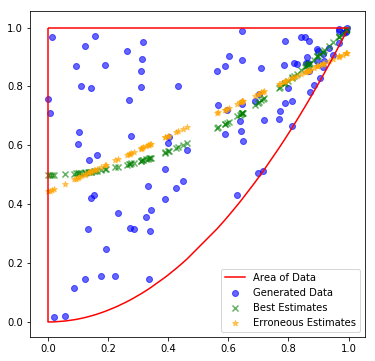

In [41]:
### Let's calculate and plot the estimates
y_est = np.empty(N)
for idx,x in enumerate(x_array):
    y_est[idx] = (x**2 + 1) / 2

y_erron = np.empty(N)
for idx,x in enumerate(x_array):
    y_erron[idx] = best_erroneous_estimator(x)
    
### Let's plot the data
plt.figure(figsize=(6,6))
plt.scatter(x=x_array, y=y_array, marker='o',color='blue', alpha=0.6,label='Generated Data')
plt.scatter(x=x_array, y=y_est, marker='x',color='green', alpha=0.6,label='Best Estimates')
plt.scatter(x=x_array, y=y_erron, marker='*',color='orange', alpha=0.6,label='Erroneous Estimates')
plt.hlines(xmin=0, xmax=1, y=1, colors ='r')
plt.vlines(ymin=0, ymax=1, x=0, colors ='r')
plt.plot(np.sort(x_array),np.sort(x_array)**2, 'r', label='Area of Data')
plt.legend(loc=4)
plt.show()
plt.close()

In [46]:
### Let's see how badly the erroneous assumption would be:
mse1 = (y_array - y_est)**2 
mse1 = mse1.sum() / y_array.shape[0]

mse2 = (y_array - y_erron)**2 
mse2 = mse2.sum() / y_array.shape[0]
print("The Mse of our estimator is: {}".format(mse1))
print("The Mse of the erroneous estimator is: {}".format(mse2))

The Mse of our estimator is: 0.0411820632922901
The Mse of the erroneous estimator is: 0.04266103829845146


In [47]:
### We see that the erroneous estimation is not THAT bad instead of our method given 100 points.